In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [69]:
total=pd.read_csv('total_vacunas.csv')
total.head()
date=total['fecha']

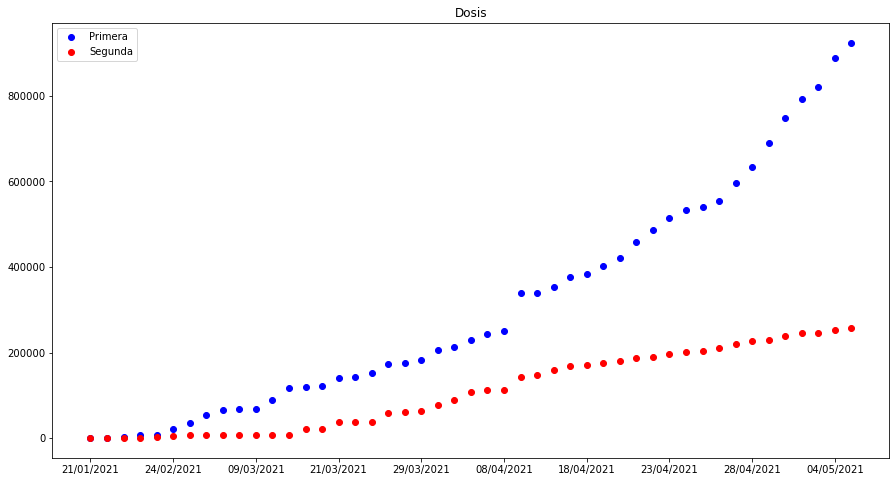

In [70]:
plt.figure(figsize=(15,8))
plt.scatter(total['fecha'],total['primera_dosis'], color="b")
plt.scatter(total['fecha'],total['segunda_dosis'], color="r")
plt.xticks(total.fecha[::5].tolist())
plt.title('Dosis')
plt.legend(['Primera','Segunda'])

In [71]:
total['fecha'] = pd.to_datetime(total['fecha'])
total['fecha']=pd.to_datetime(total['fecha'].astype(str), format='%Y-%m-%d')


In [72]:
from datetime import datetime,timedelta
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
total=pd.read_csv('total_vacunas.csv')

total['fecha'] = total['fecha'].map(lambda x : (datetime.strptime(x, '%d/%m/%Y') - datetime.strptime("01/01/2021", '%d/%m/%Y')).days)
x=total['fecha'].values.reshape(-1,1)
y=total['primera_dosis'].values.reshape(-1,1)

In [73]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model2=LinearRegression()
model2.fit(X_train, y_train)
y_pred=model2.predict(x)

In [74]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
pol_pred=pol_reg.predict(poly_reg.fit_transform(x))

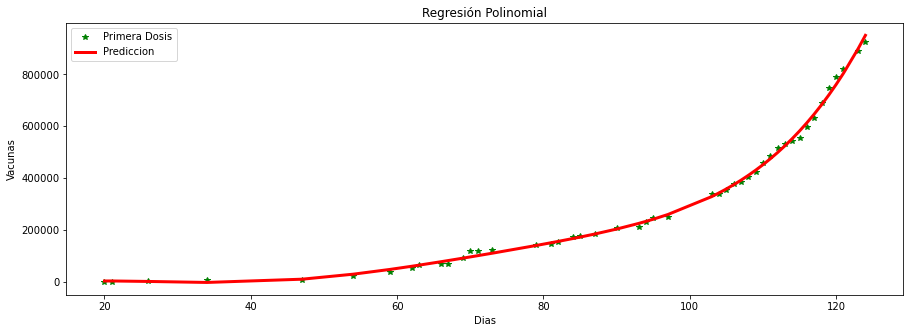

In [75]:
plt.figure(figsize = (15,5))
def graficar():
    plt.plot(x, y,'*g')
    plt.plot(x, pol_pred,  '-', linewidth = 3, color='r')
    plt.title('Regresión Polinomial')
    plt.xlabel('Dias')
    plt.ylabel('Vacunas')
    plt.legend(['Primera Dosis', 'Prediccion'])
    plt.show()
    return

graficar()

In [76]:
fecha_fin='15/09/2021'
fecha_fin=(datetime.strptime(fecha_fin, '%d/%m/%Y') - datetime.strptime("01/01/2021", '%d/%m/%Y')).days
pol_pred=pol_reg.predict(poly_reg.fit_transform([[fecha_fin]]))
pol_pred

array([[1.8609199e+08]])

# Regresion Segunda Dosis

In [155]:
y_segunda=total['segunda_dosis'].values.reshape(-1,1)
x=total['fecha'].values.reshape(-1,1)
poly_reg_segunda = PolynomialFeatures(degree=1)
X_poly = poly_reg_segunda.fit_transform(x)
pol_reg_segunda = LinearRegression()
pol_reg_segunda.fit(X_poly, y_segunda)

print("Score Lineal : ",pol_reg_segunda.score(X_poly,y_segunda))

Score Lineal :  0.8292522681365518


In [161]:
y_segunda=total['segunda_dosis'].values.reshape(-1,1)
x=total['fecha'].values.reshape(-1,1)
poly_reg_segunda = PolynomialFeatures(degree=3)
X_poly = poly_reg_segunda.fit_transform(x)
pol_reg_segunda = LinearRegression()
pol_reg_segunda.fit(X_poly, y_segunda)
pol_pred_segunda=pol_reg_segunda.predict(poly_reg_segunda.fit_transform(x))
print("Score Polinomial : ",pol_reg_segunda.score(X_poly,y_segunda))

Score Polinomial :  0.9943044513243645


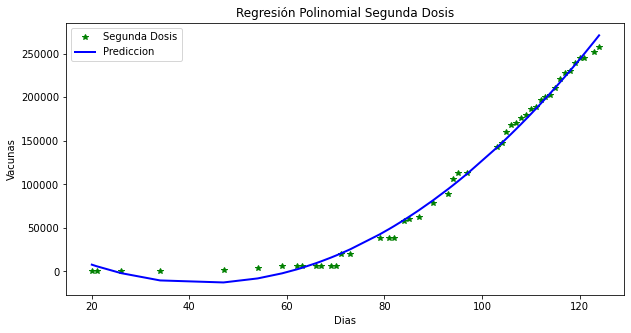

In [162]:
plt.figure(figsize = (10,5))
plt.plot(x, y_segunda,'*g')
plt.plot(x, pol_pred_segunda,  '-', linewidth = 2, color='b')
plt.title('Regresión Polinomial Segunda Dosis')
plt.xlabel('Dias')
plt.ylabel('Vacunas')
plt.legend(['Segunda Dosis', 'Prediccion'])
plt.show()

In [128]:
fecha_fin_ecu='20/09/2022'
fecha_fin_ecu=(datetime.strptime(fecha_fin_ecu, '%d/%m/%Y') - datetime.strptime("01/01/2021", '%d/%m/%Y')).days
d=np.arange(40,fecha_fin_ecu, dtype=int)
f=pol_reg_segunda.predict(poly_reg_segunda.fit_transform(d.reshape(-1,1)))

Text(0, 0.5, 'Dosis')

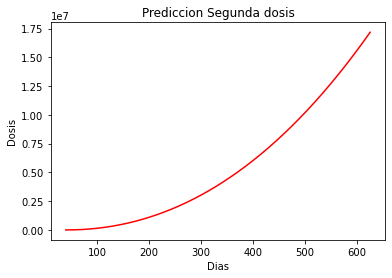

In [148]:
plt.plot(d,f, '-r')
plt.title('Prediccion Segunda dosis')
plt.xlabel('Dias')
plt.ylabel('Dosis')

array([[17250772.41684228]])

# Prediccion Total infectados en una fecha, fecha a vacunarse todos

In [114]:
x=total['fecha'].values.reshape(-1,1)
y=total['dosis_total'].values.reshape(-1,1)

In [115]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [117]:

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
pol_pred=pol_reg.predict(poly_reg.fit_transform(x))

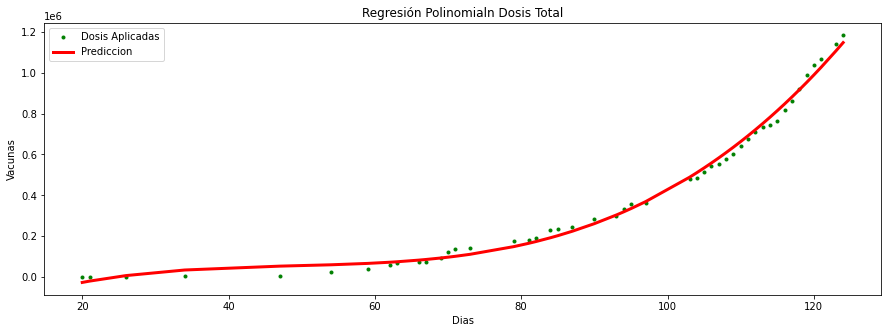

In [118]:
plt.figure(figsize = (15,5))

plt.plot(x, y,'.g')
plt.plot(x, pol_pred,  '-', linewidth = 3, color='r')
plt.title('Regresión Polinomialn Dosis Total')
plt.xlabel('Dias')
plt.ylabel('Vacunas')
plt.legend(['Dosis Aplicadas', 'Prediccion'])
plt.show()


In [119]:
nueva_fecha='29/07/2022'
fec =  (datetime.strptime(nueva_fecha, '%d/%m/%Y') - datetime.strptime("01/01/2021", '%d/%m/%Y')).days
prediccion_fecha= pol_reg.predict( poly_reg.fit_transform([[fec]]))
prediccion_fecha

array([[3.47025744e+08]])

In [120]:
# en la anterior seccion solo analizamos un dia especifica en el proximo anio 
# realizamos otra grafica donde se analisa los datos desde fin de anio hasta el final de abril del 2022 fecha tentiva que
# todos se vacunaran 
import numpy as np

fechas=np.arange(60, fec, dtype=int)
prediccion_fecha= pol_reg.predict( poly_reg.fit_transform(fechas.reshape(-1, 1)))

Text(0.5, 0, 'Dias')

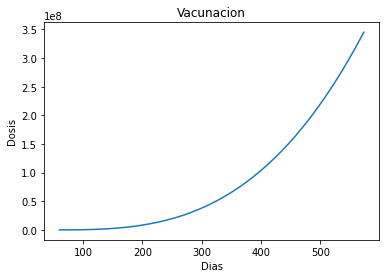

In [121]:
plt.plot(fechas,prediccion_fecha)
plt.title('Vacunacion')
plt.ylabel('Dosis')
plt.xlabel('Dias')